In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po
import os

In [31]:
gd=pd.read_csv("/content/gdp.csv")

In [ ]:
gd

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [ ]:
gd.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [ ]:
gd.isnull().sum() #to check if there any null values in the dataset

,0
Country Name,0
Country Code,0
Year,0
Value,0


In [ ]:
gd['Country Name'].describe()#to describe the particular column

1) How many unique Countries Data we're having in the dataset?

In [ ]:
uq=gd['Country Name'].unique()

To get the count of a unique country

In [ ]:
c=0
for x in gd['Country Name'].unique():
    c+=1
print(c)

256


2.Analysing Arab word

In [ ]:
p = gd[gd['Country Name'] == 'Arab World']

In [ ]:
print(p)

<Axes: xlabel='YEARS', ylabel='GDP VALUES'>

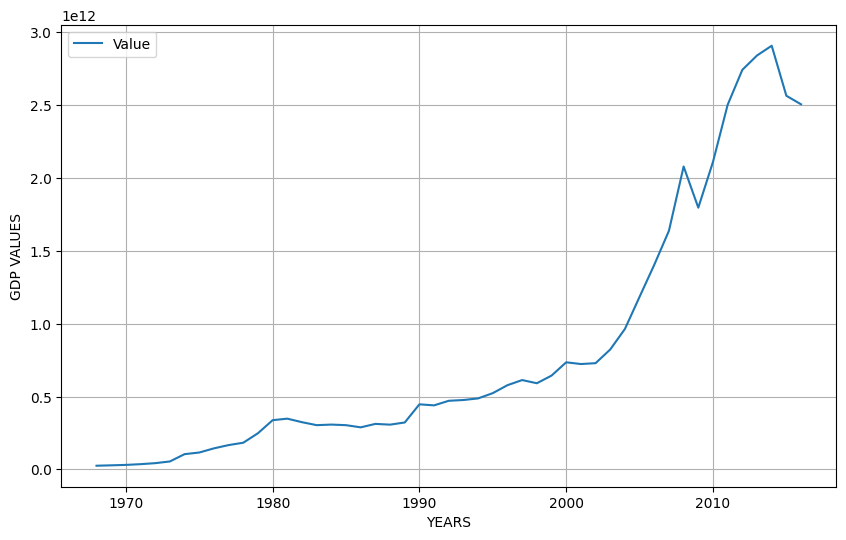

In [ ]:
p.plot(kind='line',x='Year',y='Value',figsize=(10,6),grid=True,ylabel='GDP VALUES',xlabel='YEARS')

3. Analaysis the gdp value to the countries

In [37]:
data = gd.values

gdp_change = [0]

for i in range(1,len(data)):

    prev = data[i-1][3]
    cur = data[i][3]

    gdp_change.append(round(((cur - prev) / prev)*100,2))


In [38]:
gd.assign(GDP = gdp_change)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


4.GDP value for every country

In [39]:
# Calculate GDP % change
data = gd.values
gdp_change = [0]   # first row has no previous value

for i in range(1, len(data)):
    prev = data[i-1][3]   # previous year's GDP (assuming column index 3 is GDP)
    cur = data[i][3]      # current year's GDP
    gdp_change.append(round(((cur - prev) / prev) * 100, 2))

# Add GDP change as a new column
gd['GDP'] = gdp_change
print(gd)


      Country Name Country Code  Year         Value    GDP
0       Arab World          ARB  1968  2.576068e+10   0.00
1       Arab World          ARB  1969  2.843420e+10  10.38
2       Arab World          ARB  1970  3.138550e+10  10.38
3       Arab World          ARB  1971  3.642691e+10  16.06
4       Arab World          ARB  1972  4.331606e+10  18.91
...            ...          ...   ...           ...    ...
11502     Zimbabwe          ZWE  2012  1.424249e+10  17.72
11503     Zimbabwe          ZWE  2013  1.545177e+10   8.49
11504     Zimbabwe          ZWE  2014  1.589105e+10   2.84
11505     Zimbabwe          ZWE  2015  1.630467e+10   2.60
11506     Zimbabwe          ZWE  2016  1.661996e+10   1.93

[11507 rows x 5 columns]


5. ploting the GDO with plotlyplotly

In [28]:
pl=gd[gd['Country Name'] == 'India']

In [ ]:
pl.head()

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,82.25
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64


In [40]:
plot=px.line(pl,x='Year',y='Value',title='GDP OF INDIA')
plot

To save the process in offline

In [ ]:
po.plot(plot,filename='gdp_india.html')#po-- is potley offile

'gdp_india.html'

6. GDP all the country

In [ ]:
os.mkdir('country_gdp')

for country in gd['Country Name'].unique():
    country_data = gd[gd['Country Name'] == country]
    plot = px.line(country_data, x='Year', y='Value', title=f'GDP of {country}')
    po.plot(plot, filename=f'country_gdp/{country}.html')

7. comparing two countries gdp

In [43]:
c1=gd[gd['Country Name']=='India']
c2=gd[gd['Country Name']=='China']
con=pd.concat([c1,c2])

In [ ]:
px.line(con,x='Year',y='Value',title='GDP OF INDIA & CHINA',color='Country Name' )

8.GDP analysis between multiple country

In [3]:
gd['Country Code'].unique()

array(['ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA', 'EMU', 'ECS',
       'ECA', 'TEC', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 'IDB',
       'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC',
       'LMC', 'MEA', 'MNA', 'TMN', 'MIC', 'NAC', 'OED', 'OSS', 'PSS',
       'PST', 'PRE', 'SST', 'SAS', 'TSA', 'SSF', 'SSA', 'TSS', 'UMC',
       'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH',
       'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND',

In [44]:
lst=['IND','PAK','USA','AUS','SWZ']

def country_plot(lst):
  country_data=[]
  for x in lst:
    country_data.append(gd[gd['Country Code']==x])
    pr = pd.concat(country_data)  # merge them into one DataFrame

  t = "GDP OF - " + ", ".join(lst)   # title string

  plot = px.line(pr, x='Year', y='Value', title=t, color='Country Name')
  plot.show()

# Example call
country_plot(['USA','SWZ'])



In [45]:
lst=['IND','PAK','USA','AUS','SWZ']

def country_plot(lst):
  country_data=[]
  for x in lst:
    country_data.append(gd[gd['Country Code']==x])
    pr = pd.concat(country_data)  # merge them into one DataFrame

  t = "GDP OF - " + ", ".join(lst)   # title string

  plot = px.line(pr, x='Year', y='Value', title=t, color='Country Name')
  plot.show()

# Example call
country_plot(['USA','SWZ','AUS'])

In [46]:
dfs = []

for country_name in gd['Country Name'].unique():
    df_pr = gd[gd['Country Name'] == country_name]

    if (len(df_pr) == 57):
        dfs.append(df_pr)

df_pr = pd.concat(dfs, axis = 0)

In [49]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')
fig.show()